#Importações

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

#Dataset


In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart.shape

(303, 14)

#Análise Exploratória

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#Preparação dos dados

In [ ]:
heart2 = heart.iloc[:,:-1]
heart2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


#Gráficos

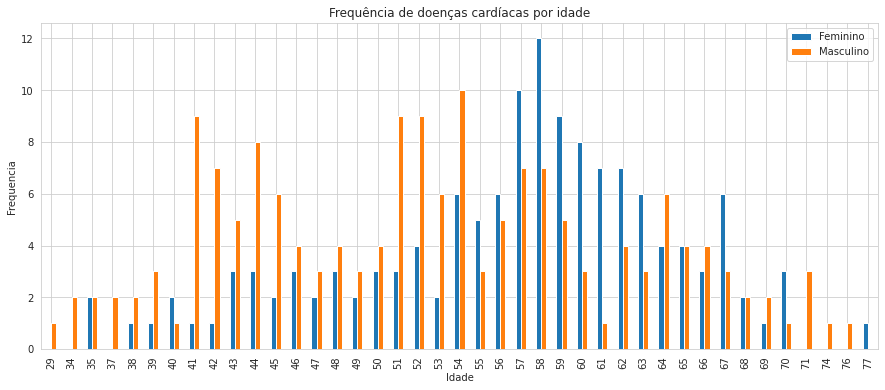

In [ ]:
pd.crosstab(heart.age,heart.target).plot(kind="bar",figsize=(15,6))
plt.title('Frequência de doenças cardíacas por idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.legend(["Feminino", "Masculino"])
plt.savefig('FrequenciaDoencasCardiacasPorIdade.png')
plt.show()

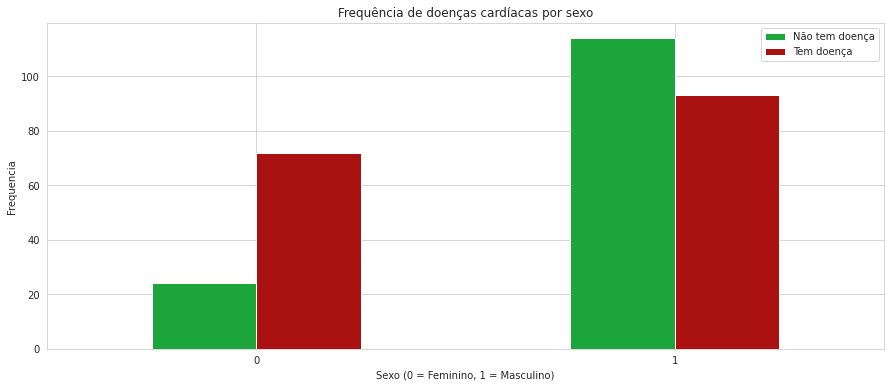

In [ ]:
pd.crosstab(heart.sex,heart.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frequência de doenças cardíacas por sexo')
plt.xlabel('Sexo (0 = Feminino, 1 = Masculino)')
plt.xticks(rotation=0)
plt.legend(["Não tem doença", "Tem doença"])
plt.ylabel('Frequencia')
plt.savefig('FrequenciaDoencasCardiacasPorSexo.png')
plt.show()

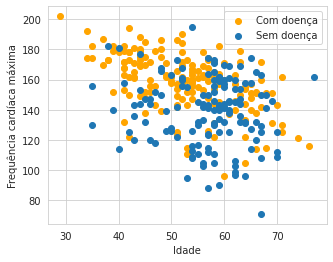

In [ ]:
plt.scatter(x=heart.age[heart.target==1], y=heart.thalach[(heart.target==1)], c="orange")
plt.scatter(x=heart.age[heart.target==0], y=heart.thalach[(heart.target==0)])
plt.legend(["Com doença", "Sem doença"])
plt.xlabel("Idade")
plt.ylabel("Frequência cardíaca máxima")
plt.show()

#Agrupamento

In [ ]:
modelo = KMeans(n_clusters=3)
modelo.fit(heart2)
grupos = modelo.predict(heart2)
print(grupos)

[2 2 1 2 0 1 0 2 1 1 2 2 2 1 2 1 0 2 2 2 2 2 2 2 1 0 1 1 0 1 1 1 1 2 1 1 0
 2 2 0 0 2 1 2 0 0 2 2 1 2 2 0 2 1 2 1 1 2 1 0 2 0 1 1 1 1 1 2 1 1 2 1 1 2
 1 2 2 1 1 2 2 0 0 0 2 0 2 1 1 2 2 1 1 0 1 2 0 2 0 2 2 2 1 2 1 1 2 2 2 2 0
 1 0 1 2 1 1 1 1 2 0 2 2 2 1 1 1 2 1 2 1 2 0 2 0 2 1 1 1 2 0 0 1 1 1 2 2 2
 1 1 2 1 2 2 1 1 2 1 1 1 2 0 1 1 1 2 2 2 2 1 2 2 2 1 1 1 2 0 1 2 0 2 0 2 2
 0 2 2 2 1 0 1 1 2 1 0 2 2 2 2 1 2 2 2 1 2 2 2 1 1 2 2 1 0 2 0 2 0 2 2 0 1
 2 0 2 1 2 1 0 0 2 0 0 2 0 0 0 0 0 2 2 2 1 2 1 2 0 2 2 2 0 2 0 0 2 0 2 1 2
 2 2 2 2 2 1 1 0 1 2 2 2 2 2 2 2 1 1 2 0 1 0 1 1 1 1 0 1 2 0 1 1 0 2 1 1 1
 1 1 2 2 1 1 2]


#Visualização

In [ ]:
# sugestão: TSNE
xs = heart.iloc[:,0]
ys = heart.iloc[:,2]
centroids = modelo.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,2]
print(xs)
print(ys)
print(centroids_x)
print(centroids_y)

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64
0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64
[56.27118644 51.80733945 55.6       ]
[0.71186441 1.04587156 1.01481481]


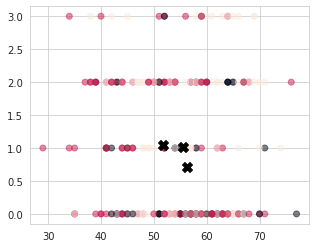

In [ ]:
_=plt.scatter(xs,ys,c=grupos,alpha=.5)
_=plt.scatter(centroids_x,centroids_y,c='black',marker='X',s=100)

#Avaliação

In [ ]:
df = pd.DataFrame({'grupos':grupos,'species':heart['target']})
ct = pd.crosstab(df['grupos'],df['species'])
print(df)
print(ct)

     grupos  species
0         2        1
1         2        1
2         1        1
3         2        1
4         0        1
..      ...      ...
298       2        0
299       2        0
300       1        0
301       1        0
302       2        0

[303 rows x 2 columns]
species   0   1
grupos         
0        31  28
1        40  69
2        67  68


In [ ]:
ks = range(1,6)
inercias = []
for k in ks:
    modelo = KMeans(n_clusters=k)
    modelo.fit(heart2)
    inercias.append(modelo.inertia_)
inercias

[1089072.101650165,
 605149.704746585,
 471765.1375235559,
 391596.27125405264,
 333153.74185816786]

([<matplotlib.axis.XTick at 0x7ff9ae7a04d0>,
 <a list of 5 Text major ticklabel objects>)

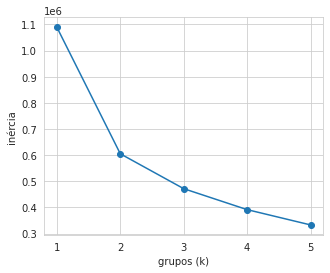

In [ ]:
_=plt.plot(ks,inercias,'-o')
plt.xlabel('grupos (k)')
plt.ylabel('inércia')
plt.xticks(ks)

Melhor resultado conforme o 'cotovelo ou joelhos' no grafico de inercia seria 2 ou 3

#DBSCAN

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter
%matplotlib inline
rcParams['figure.figsize']=5,4
sb.set_style('whitegrid')
data =  heart.iloc[:,0:13]
target = heart.iloc[:,13]
heart[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
modelo = DBSCAN(eps=0.8,min_samples=19).fit(data)

In [ ]:
outliers_df = pd.DataFrame(data)
print( Counter(modelo.labels_))
print(outliers_df[modelo.labels_==-1])

Counter({-1: 303})
     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


Text(0.5, 1.0, 'DBScan')

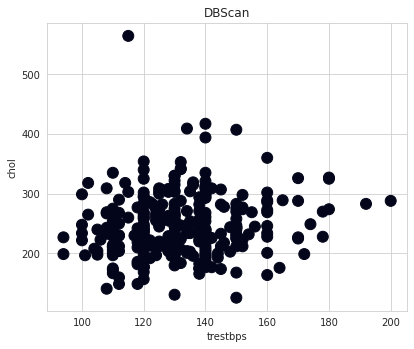

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])
colors = modelo.labels_
a = data['trestbps']
b = data['chol']
ax.scatter(a,b,c=colors,s=120)
ax.set_xlabel('trestbps')
ax.set_ylabel('chol')
plt.title('DBScan')